PHASE-3: PREPROCESSING AND VISUALIZATION

Step: 1 Import the necessary library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Step: 2 Import the the association rules.

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

Step: 3 Upload the dataset

In [2]:
from google.colab import files
data = files.upload()

Saving Assignment-1_Data.xlsx to Assignment-1_Data.xlsx


Step: 4 Read the dataset using

In [3]:
df = pd.read_excel('Assignment-1_Data.xlsx')
print(df)

        BillNo                             Itemname  Quantity  \
0       536365   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365                  WHITE METAL LANTERN         6   
2       536365       CREAM CUPID HEARTS COAT HANGER         8   
3       536365  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365       RED WOOLLY HOTTIE WHITE HEART.         6   
...        ...                                  ...       ...   
522059  581587          PACK OF 20 SPACEBOY NAPKINS        12   
522060  581587          CHILDREN'S APRON DOLLY GIRL         6   
522061  581587         CHILDRENS CUTLERY DOLLY GIRL         4   
522062  581587      CHILDRENS CUTLERY CIRCUS PARADE         4   
522063  581587         BAKING SET 9 PIECE RETROSPOT         3   

                      Date  Price  CustomerID         Country  
0      2010-12-01 08:26:00   2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00   3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00 

Step: 5 Display the particular rows and  columns in a dataset.

In [4]:
df.head(20)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


Step: 6 Preprocessing:
Data Collection: Gather transactional data that includes information about items purchased together.

Data Cleaning:
Handle missing values if any.
Remove duplicate transactions or items.
Ensure consistency in item names and encoding.

Transaction Consolidation:
Group transactions by a unique identifier (e.g., customer ID or transaction ID).

Filtering Rules:
Apply metrics like support, confidence, and lift to filter out rules that are not statistically significant or do not meet certain thresholds.

In [5]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)

df = pd.read_excel("Assignment-1_Data.xlsx")
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
def retail_data_prep(dataframe):
    dataframe = dataframe[dataframe["Quantity"] > 0]
    dataframe = dataframe[dataframe["Price"] > 0]
    replace_with_thresholds(dataframe, "Quantity")
    replace_with_thresholds(dataframe, "Price")
    return dataframe

df = retail_data_prep(df)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,519551.0,9.397420,21.281261,1.000,1.00,3.00,10.00,248.50
Price,519551.0,3.326470,3.877380,0.001,1.25,2.08,4.13,41.94
CustomerID,387985.0,15317.042994,1721.813298,12346.000,13950.00,15265.00,16837.00,18287.00


Step: 7 Find the null values on the dataset


In [6]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


BillNo             0
Itemname           0
Quantity           0
Date               0
Price              0
CustomerID    131566
Country            0
dtype: int64

Step: 8 Display the frequency items from the dataset using association rules.

In [10]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


data = pd.read_excel('Assignment-1_Data.xlsx')

transactions = data.groupby(['Price', 'Itemname'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Price')
transactions = transactions.applymap(lambda x: 1 if x > 0 else 0)


min_support = 0.05
frequent_itemsets = apriori(transactions, min_support=min_support, use_colnames=True)


min_threshold = 1.0
association_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_threshold)
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(association_rules)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Frequent Itemsets:
    support          itemsets
0  0.534630  (DOTCOM POSTAGE)
1  0.097276          (Manual)

Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Step: 9 Visualization: "Visualization in our project refers to the art and science of representing complex market basket data in a visually intuitive and meaningful way. Through the use of various graphical techniques such as heatmaps, network diagrams, bar charts, and interactive dashboards, we aim to transform raw transactional data into insightful visual representations. These visualizations serve as a powerful tool for unraveling patterns, relationships, and trends within the market basket, providing a clear and accessible means for stakeholders to comprehend and act upon the underlying insights derived from the data."

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   BillNo                             Itemname  Quantity                Date  Price  CustomerID         Country
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   2.55     17850.0  United Kingdom
1  536365                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   3.39     17850.0  United Kingdom
2  536365       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   2.75     17850.0  United Kingdom
3  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   3.39     17850.0  United Kingdom
4  536365       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   3.39     17850.0  United Kingdom


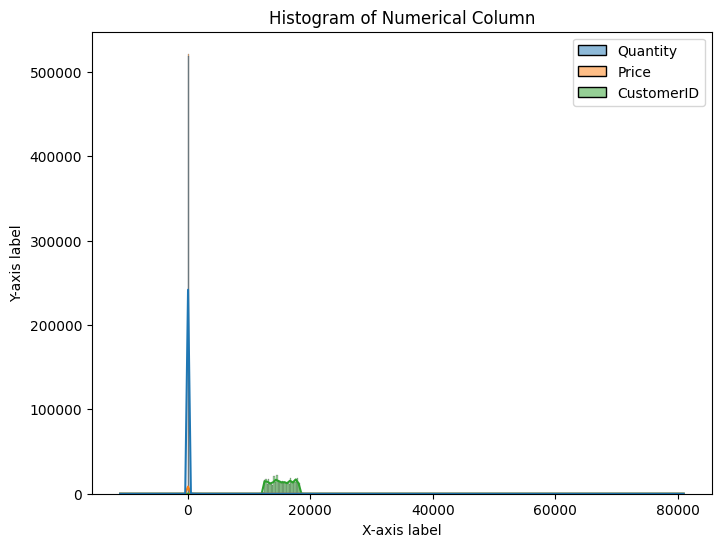

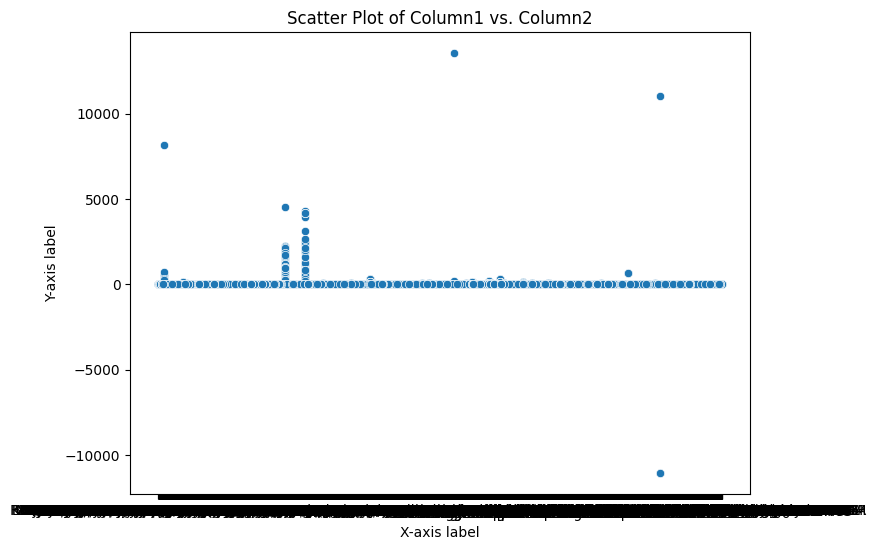

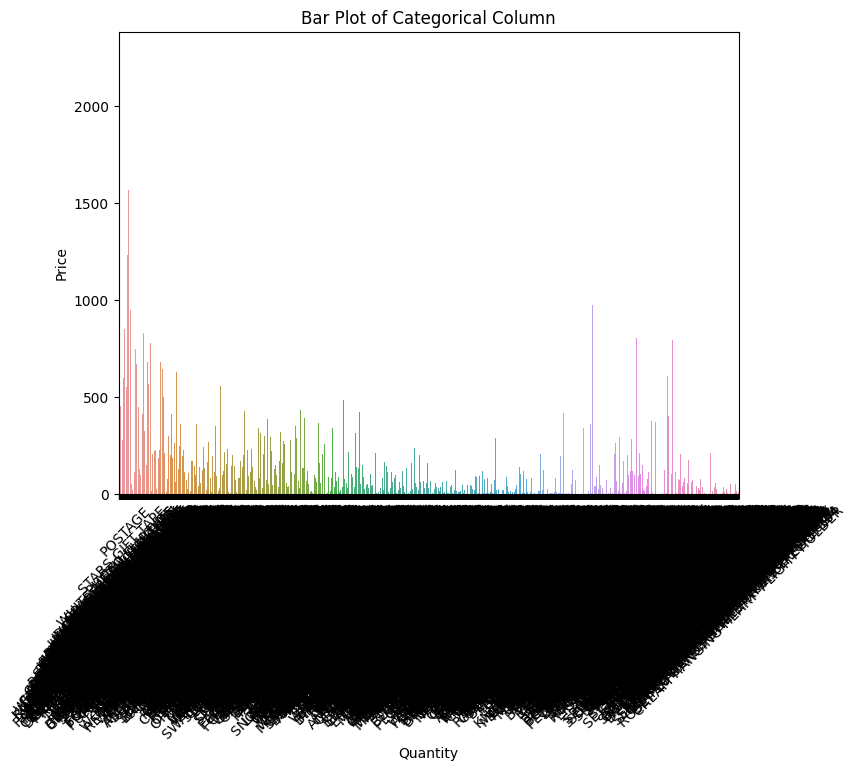

In [13]:
import seaborn as sns
dataset = pd.read_excel("Assignment-1_Data.xlsx")
print(dataset.head())
plt.figure(figsize=(8, 6))
sns.histplot(dataset, kde=True)
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Histogram of Numerical Column')
plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Itemname', y='Price', data=dataset)
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter Plot of Column1 vs. Column2')

plt.figure(figsize=(8, 6))
sns.countplot(x='Itemname', data=dataset)
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Bar Plot of Categorical Column')
plt.xticks(rotation=45)
plt.show()